<a href="https://colab.research.google.com/github/JakBel/machine-learning/blob/main/supervised/03_classification/03_gini_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

sns.set(font_scale=1.3)
np.random.seed(42)

**Wskaźnik Giniego**

Miara zanieczyszczenia

* węzeł jest czysty (wszystkie próbki w węźle należą do tej samej klasy), gdy Gini = 0

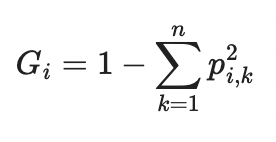

Gdzie *pi,k* = współczynnik występowania klas k wśród próbek uczących w i-tym węźle

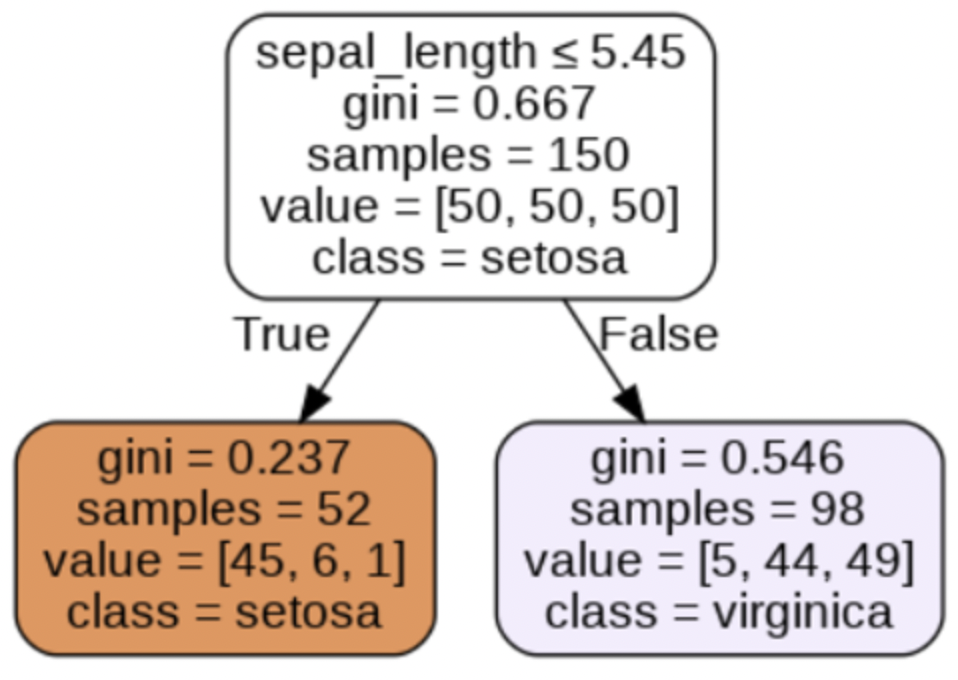

Gini dla korzenia (root) - poziom 0

In [2]:
1 - (50 / 150)**2 - (50 / 150)**2 - (50 / 150)**2

0.6666666666666665

Poziom 1, węzeł lewy

In [3]:
1 - (45 / 52)**2 - (6 / 52)**2 - (1 / 52)**2

0.23742603550295852

Poziom 1, węzeł prawy

In [4]:
1 - (5 / 98)**2 - (44 / 98)**2 - (49 / 98)**2

0.5458142440649729

**Entropia** (czym mniejsza, tym zbiór jest czystszy)

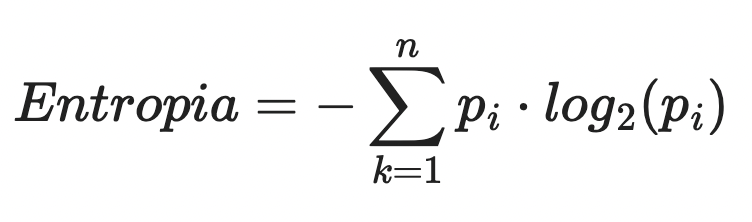

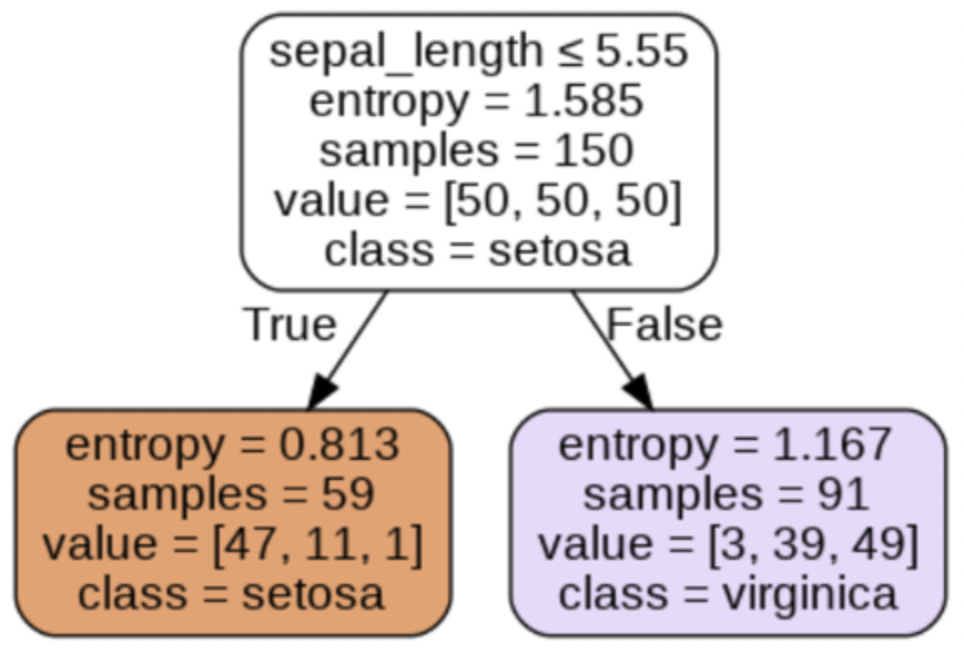

Entropia dla korzenia (root) - poziom 0

In [5]:
-((50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150))

1.584962500721156

Poziom 1, węzeł lewy

In [6]:
-((47 / 59) * np.log2(47 / 59) + (11 / 59) * np.log2(11 / 59) + (1 / 59) * np.log2(1 / 59))

0.8128223064150747

Poziom 1, wezeł prawy

In [7]:
-((3 / 91) * np.log2(3 / 91) + (39 / 91) * np.log2(39 / 91) + (49 / 91) * np.log2(49/ 91))

1.167065448996099

In [8]:
from scipy.stats import entropy

print(entropy([0.5, 0.5], base=2))
print(entropy([0.8, 0.2], base=2))
print(entropy([0.95, 0.05], base=2))

1.0
0.7219280948873623
0.2863969571159562


In [9]:
def entropy(x):
    return -np.sum(x * np.log2(x))

print(entropy([0.5, 0.5]))
print(entropy([0.8, 0.2]))
print(entropy([0.95, 0.05]))

1.0
0.7219280948873623
0.28639695711595625


In [10]:
p = np.arange(0.01, 1.0, 0.01)
q = 1 - p
pq = np.c_[p,q]
pq[:10]

array([[0.01, 0.99],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.05, 0.95],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.08, 0.92],
       [0.09, 0.91],
       [0.1 , 0.9 ]])

In [11]:
entropies = [entropy(pair) for pair in pq]
entropies[:10]

[0.08079313589591118,
 0.14144054254182067,
 0.1943918578315762,
 0.24229218908241482,
 0.28639695711595625,
 0.32744491915447627,
 0.3659236509002231,
 0.4021791902022728,
 0.43646981706410287,
 0.4689955935892812]

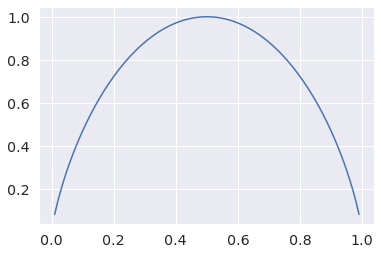

In [12]:
plt.plot(p, entropies)

##Rozważmy dane

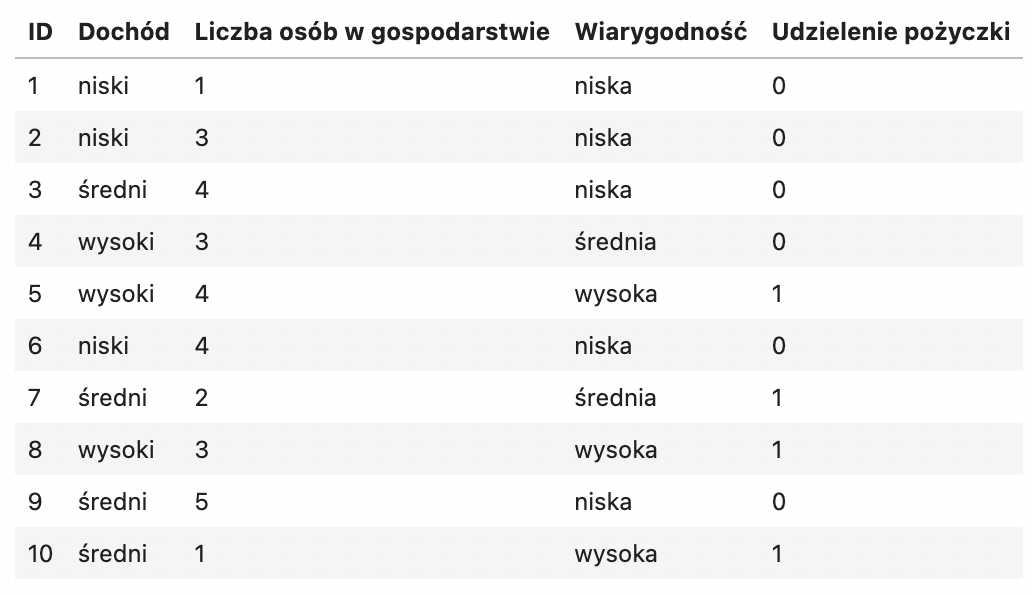

Rozkład zmiennej "Udzielenie pożyczki"

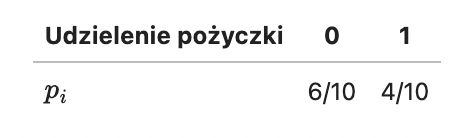

Wzór na entropię:

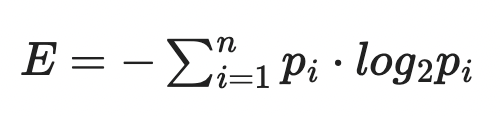

Entropia po podziale:

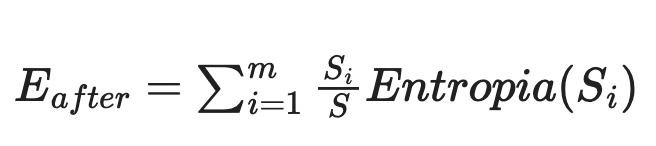

gdzie: *S* - podział; *m* - liczba podziałów

In [13]:
entropia = -(6/10 * np.log2(6/10) + (4/10) * np.log2(4/10))
entropia

0.9709505944546686

**Rozkład zmiennej *Wiarygodność***

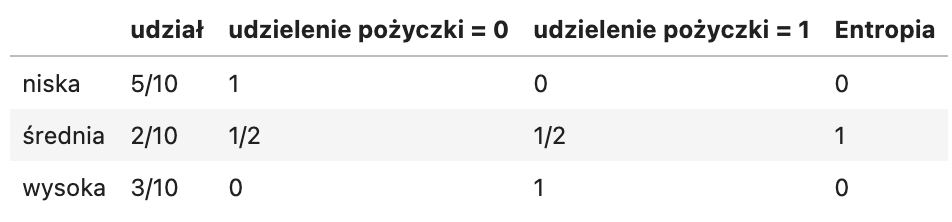

Entropia po podziale

In [14]:
entropia_wiarygodnosc = 5/10 * 0 + 2/10 * 1 + 3/10 * 0
entropia_wiarygodnosc

0.2

**Rozkład zmiennej *Dochód***

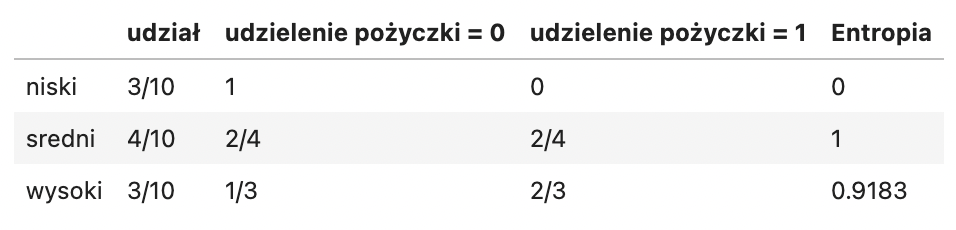

Entropia po podziale

In [15]:
entropia_dochod = 3/10 * 0 + 4/10 * 1 + 3/10 * 0.9183
entropia_dochod

0.67549

**Zysk informacyjny**

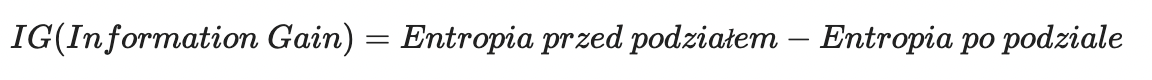

In [16]:
ig_wiarygodnosc = entropia - entropia_wiarygodnosc
ig_dochod = entropia - entropia_dochod

print('Zysk informacyjny (IG): wiarygodność:', ig_wiarygodnosc)
print('Zysk informacyjny (IG): dochód:', ig_dochod)

Zysk informacyjny (IG): wiarygodność: 0.7709505944546686
Zysk informacyjny (IG): dochód: 0.29546059445466855
